In [20]:
#importing Neccesary Libraries
import pandas as pd; pd.set_option('display.max_rows', 1000);
pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from statsmodels.stats import diagnostic as diag
from statsmodels.compat import lzip

In [7]:
Advertising_df= pd.read_csv('Advertising.csv',
                    names = ['TV','Radio','Newspaper','Sales'], header = 0)

In [8]:
Advertising_df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
print(Advertising_df.info())   #info abt data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [12]:
print(Advertising_df.head().T) #trasnpose of data

               1     2     3      4      5
TV         230.1  44.5  17.2  151.5  180.8
Radio       37.8  39.3  45.9   41.3   10.8
Newspaper   69.2  45.1  69.3   58.5   58.4
Sales       22.1  10.4   9.3   18.5   12.9


In [13]:
x= Advertising_df[['TV','Radio','Newspaper']]
y= Advertising_df['Sales']

In [14]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [15]:
Advertising_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


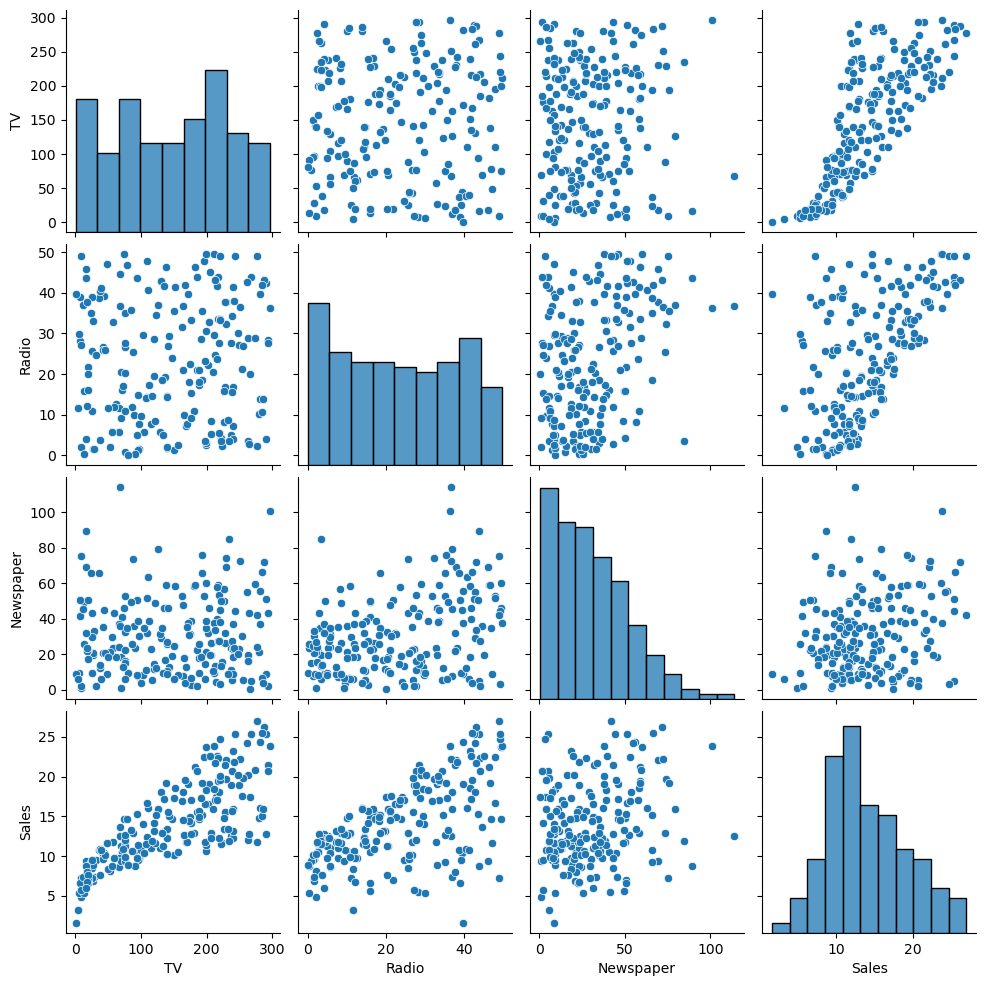

In [16]:
p = sns.pairplot(Advertising_df)

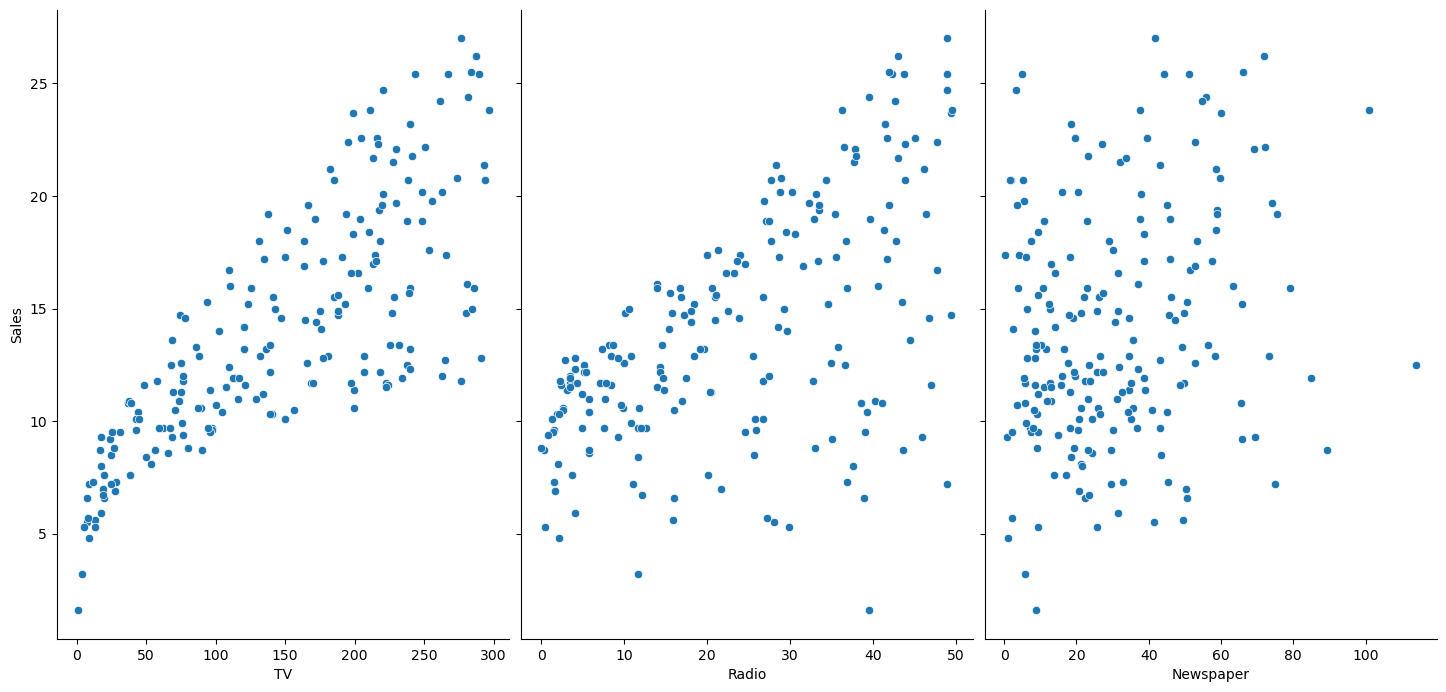

In [58]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(Advertising_df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

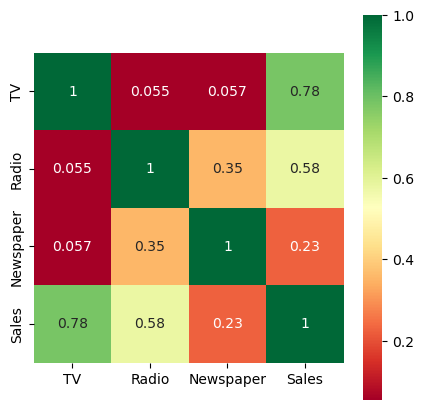

In [56]:
plt.figure(figsize=(5,5))  
p=sns.heatmap(Advertising_df.corr(), annot=True,cmap='RdYlGn',square=True) 

## Assumptions of Linear Regression

### 1) Absence of multi-collinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#[varience_inflation_factor(x.values,j)for j in range(1,x.shape[1])]

In [18]:
vif=pd.DataFrame()
vif["Variables"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i)for i in range(x.shape[1])]  
#(if vif is less than 5-10 ,then multicollineartiy is not present).
vif 

,Variables,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


we dont see any variable having vif more than the thresold of 5 .hence there is no multicollinearity.

In [21]:
#build a model
x_1=sm.add_constant(x)
model=sm.OLS(y,x_1).fit() #ols=ordinary least square method
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        23:39:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
x_1.head()

,const,TV,Radio,Newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


<function matplotlib.pyplot.show(close=None, block=None)>

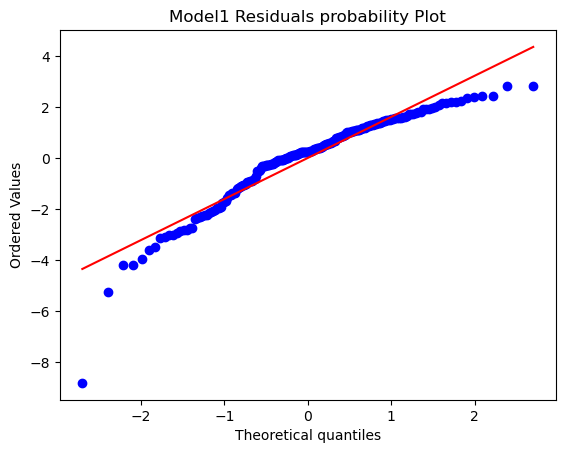

In [24]:
stats.probplot(model.resid,plot=plt)
plt.title("Model1 Residuals probability Plot")
plt.show

In [25]:
print(type(x_1))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### 2) Errors between the observed and predicted values should be normally distributed

1. for regression,the test of normality applies to a model's residuals and not the variables themselves .
2. we shall inspect the residuals using a probability plot.here the residuals will be represented as dots(in blue) should fall on the red line .
3. we use shapiro wilk test from scipy library to check the normality of residuals.
4. null hypothesis: the residuals are normally distributed.
5. alternative hypothesis: the residuals are not normally distributed. 

In [26]:
shaipro_stat,pval=stats.shapiro(model.resid)
print('P value is',pval)

P value is 3.938186221574824e-09


since the p value is 0,we decide that at 5% level of significance we reject the null hypothesis and conclude that the residuals are not normally distributed.

let us try transforming variables

In [27]:
#polynomial features are those features created by raising existing features to
degree=3
poly=PolynomialFeatures(degree)
x_ = poly.fit_transform(x)

print(x_.shape)

##build a model after log transformation
x_c=sm.add_constant(x_)
model_c=sm.OLS(y,x_c).fit()
shaipro_stat,Pval=stats.shapiro(model_c.resid)
model_linear=model_c 


(200, 20)


we shall inspect the residuals using a probability plot. here the residuals will be represented as dots (in blue) should fall on the red line.

In [28]:
Pval

7.58579830895112e-12

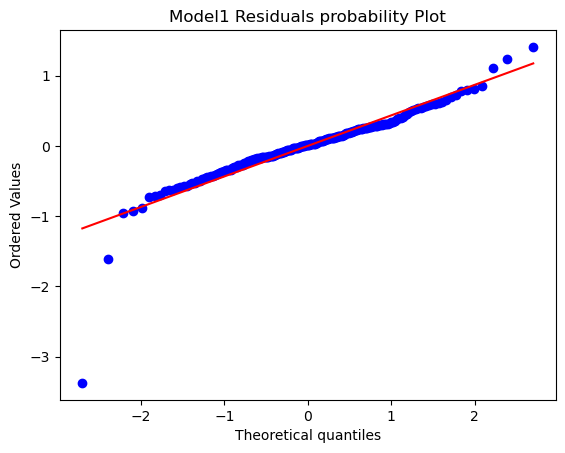

In [29]:
stats.probplot(model_c.resid,plot=plt)
plt.title("Model1 Residuals probability Plot")
plt.show()

this plot indicates that the model's residuals are normally distributed.

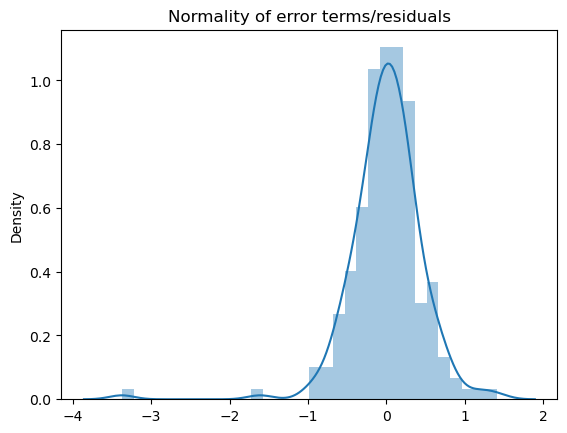

In [57]:
p = sns.distplot(model_c.resid,kde=True)
p = plt.title('Normality of error terms/residuals')

### 3) Homoscedasticity

checking heteroscedasticity using goldfled quandt

1: Null hypo: Error terms are homo....

2: Alternative: Error terms are hetero

In [30]:
residuals=model_c.resid
name=['F statistic','p-value']

test=sms.het_goldfeldquandt(residuals,model_c.model.exog)
print(lzip(name,test))

[('F statistic', 1.6923694864230738), ('p-value', 0.009842362143353125)]


since p-value is 0.0098 and <5%,we accept the alternative hypo and conclude that error terms are heteroscedastic

### 4) checking for autocorrelation

to ensure the absence of autocorrelation we use Ljungbox test.

1: Null hypo: autocorrelation is absent .

2: alternative hypo: autocorrelation is present.

In [31]:
diag.acorr_ljungbox(residuals,lags=40)
lzip(name,test)

[('F statistic', 1.6923694864230738), ('p-value', 0.009842362143353125)]

In [32]:
from statsmodels.graphics.tsaplots import pacf,plot_acf

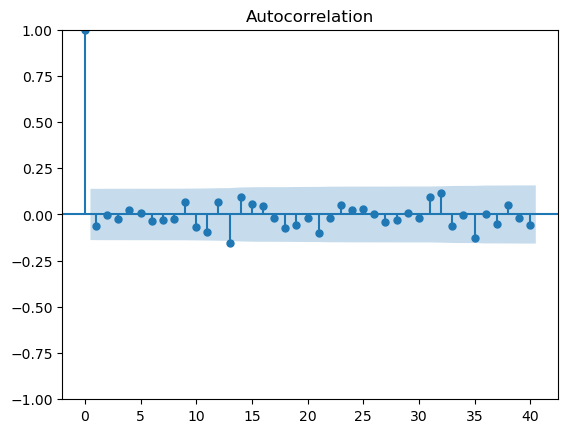

In [33]:
#autocorrelation
sm.graphics.tsa.plot_acf(residuals,lags=40)
plt.show()

the residuals plot indicates that the model's residuals are restricting to mean of zero to a great extent exhibiting linearity

the residuals plot that shows that the residuals are centred around zero and linearly distributed this indicates that the model is a good fit for thr data .this means that the model is not systematically over-or under-predicting values.

In [34]:
feature_names=['1','a','b','c','asquare','ab','ac','bsquare','bc','csquare','acube','asquareb','asquarec',
              'bsquarea','abc','csquarea','bcube','bsquarec','csquareb','ccube']
x_df = pd.DataFrame(x_,columns=feature_names)
x= x_df[['a','b','c','asquare','ab','ac','bsquare','bc','csquare','acube','asquareb','asquarec',
              'bsquarea','abc','csquarea','bcube','bsquarec','csquareb','ccube' ]]
print(x.head().T)
print(x.shape)

                     0          1           2            3            4
a         2.301000e+02     44.500      17.200      151.500      180.800
b         3.780000e+01     39.300      45.900       41.300       10.800
c         6.920000e+01     45.100      69.300       58.500       58.400
asquare   5.294601e+04   1980.250     295.840    22952.250    32688.640
ab        8.697780e+03   1748.850     789.480     6256.950     1952.640
ac        1.592292e+04   2006.950    1191.960     8862.750    10558.720
bsquare   1.428840e+03   1544.490    2106.810     1705.690      116.640
bc        2.615760e+03   1772.430    3180.870     2416.050      630.720
csquare   4.788640e+03   2034.010    4802.490     3422.250     3410.560
acube     1.218288e+07  88121.125    5088.448  3477265.875  5910106.112
asquareb  2.001359e+06  77823.825   13579.056   947927.925   353037.312
asquarec  3.663864e+06  89309.275   20501.712  1342706.625  1909016.576
bsquarea  3.287761e+05  68729.805   36237.132   258412.035    21

In [48]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [49]:
#model Building
models = {
 "LinearRegression": LinearRegression(),
 "Ridge":Ridge(),
 "LinearSVR":LinearSVR(),
 "DecisionTreeRegressor":DecisionTreeRegressor(),
 "GradientBoostingRegressor":GradientBoostingRegressor(),
 "AdaBoostRegressor":AdaBoostRegressor(),
 "RandomForestRegressor":RandomForestRegressor()}

In [50]:
#Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [51]:
for name, model in models.items():
 scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
 print("cross validation model : {}".format(name))
 rmse = np.sqrt(-scores)
 rmse_average = np.mean(rmse)
 print("AVERAGE RMSE: ",rmse_average)
 print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.5210778396828051
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.5210393184984686
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  1976.8180177907143
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.7057923139972986
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.4808371701335892
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.6331222480083591
******************************************

In [52]:
#Splitting Data into Train & Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
#Final model 
model = RandomForestRegressor()
model.fit(x_train, y_train)
RandomForestRegressor()
y_pred = model.predict(x)
result = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),dtype=float)
result.head()

,ACTUAL,PREDICTION
0,22.1,21.912
1,10.4,10.484
2,9.3,8.977
3,18.5,18.499
4,12.9,13.193


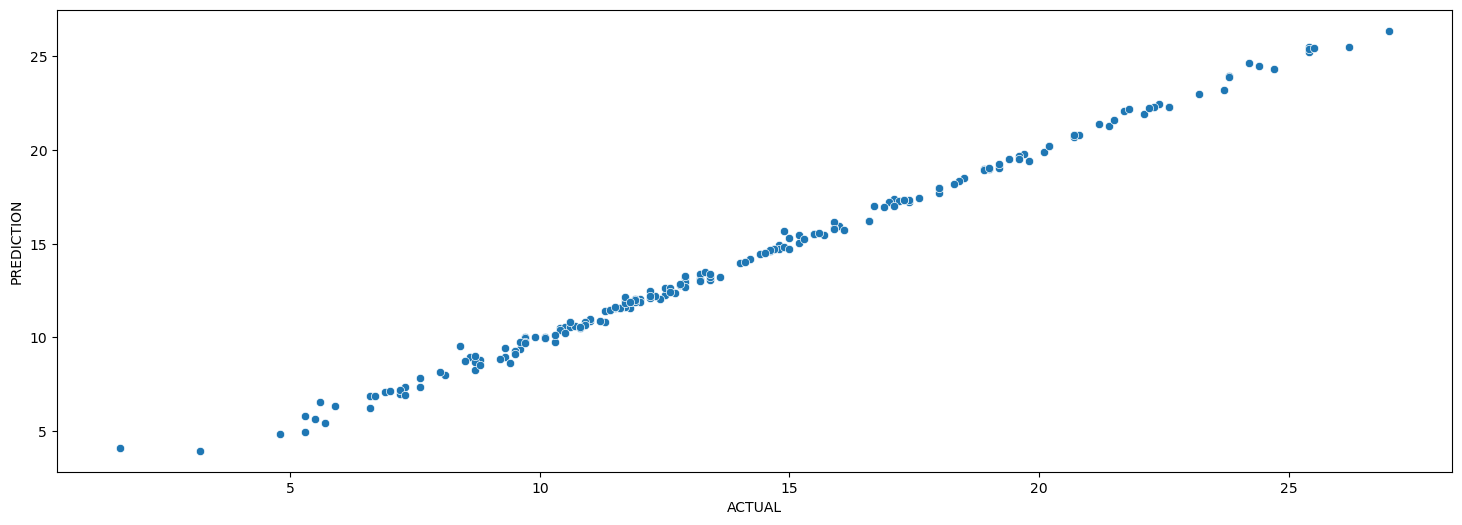

In [54]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='ACTUAL', y='PREDICTION', data=result);

In [55]:
# model accuracy
model.score(x,y)

0.9964674379672517